# problem **statements**

`This MegaStore Sales analysis aims to extract key business insights from historical transaction data. It focuses on identifying the most profitable product categories and understanding how their performance varies across regions. The project explores sales, profit, and quantity trends over time to uncover seasonal patterns that support inventory and promotion planning. It also examines regional performance differences and assesses how shipping modes influence delivery efficiency, customer satisfaction, and profitability.`

# **about the dataset**

The first few rows

The structure (columns, data types, missing values)

Basic statistics

Give me a moment to load and summarize the dataset.

Here's an overview of your MegaStore Sales dataset:

🔹 Dataset Dimensions:
Rows: 541,909

Columns: 9

🔹 Columns Summary:
Column	Description	Type	Missing Values

* InvoiceNo	Invoice number

* StockCode	Product code

* Description	Product description

* Quantity	Number of items per transaction

* InvoiceDate	Date and time of transaction
* UnitPrice	Price per item
* CustomerID	Unique customer identifier
* Country	Country of the customer
* Sales	Total sales amount (Quantity × UnitPrice)

**goals**

With the MegaStore dataset, we can track sales trends, spot bestsellers and returns, analyze customer habits, detect return patterns, segment buyers, forecast future sales, and present it all in a Power BI dashboard.

# **1. Understand the data ♻**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [ ]:
      import pandas as pd
# Assuming 'quikr_car.csv' is in the current directory or specify the full path
df = pd.read_csv('/content/superstoredata.csv.zip')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [ ]:
print(df.head(15))
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLO

In [ ]:
# Display basic info
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Sales        541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        

# **Data cleaning**

In [ ]:
# Drop unnecessary columns
df.drop('Description', axis=1, inplace=True)
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Handling missing values
df.dropna(inplace=True)


In [ ]:
# Convert InvoiceDate to datetime if available
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['Year'] = df['InvoiceDate'].dt.year
    df['Month'] = df['InvoiceDate'].dt.month
    df['Day'] = df['InvoiceDate'].dt.day
    df['Hour'] = df['InvoiceDate'].dt.hour

# **Label Encoding**

In [ ]:
# Label Encoding for categorical variables
label_cols = ['InvoiceNo', 'StockCode', 'Country']
lbl_encoder = LabelEncoder()
for col in label_cols:
    df[col] = lbl_encoder.fit_transform(df[col].astype(str))

# **Correlation Analysis**

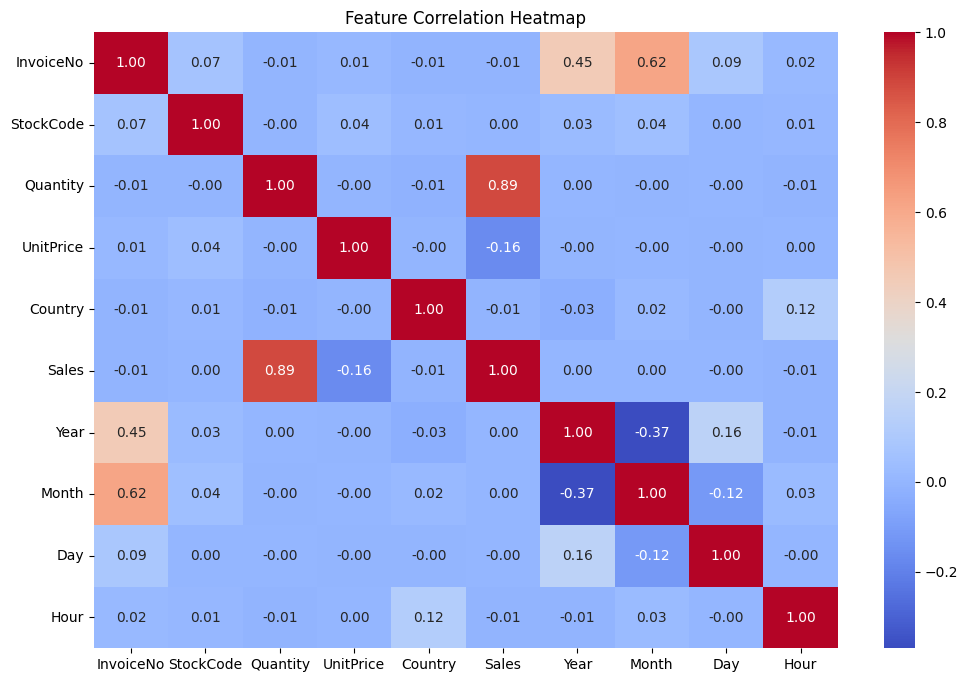

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# **Outlier Detection**

In [ ]:
# Outlier Detection and Removal
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# **Descriptive statistics**

In [ ]:
df.describe()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Sales,Year,Month,Day,Hour
count,363006.000000,363006.000000,363006.000000,363006,363006.000000,363006.0,363006.000000,363006.0,363006.000000,363006.000000,363006.000000
mean,12506.127232,1640.481504,4.360311,2011-07-22 10:24:33.933158400,2.674531,36.0,8.686813,2011.0,7.185691,15.453127,13.257541
min,1699.000000,0.000000,-12.000000,2011-01-04 10:00:00,0.000000,36.0,-15.000000,2011.0,1.000000,1.000000,8.000000
25%,7027.000000,964.000000,1.000000,2011-04-21 13:22:00,1.250000,36.0,2.900000,2011.0,4.000000,8.000000,12.000000
50%,12894.000000,1570.000000,2.000000,2011-08-07 12:42:00,2.080000,36.0,6.240000,2011.0,8.000000,15.000000,13.000000
75%,17996.000000,2174.000000,6.000000,2011-10-26 16:03:00,3.750000,36.0,15.000000,2011.0,10.000000,23.000000,15.000000
max,25899.000000,3988.000000,23.000000,2011-12-09 12:49:00,8.500000,36.0,33.040000,2011.0,12.000000,31.000000,19.000000
std,6210.001881,915.236137,4.244065,NaN,1.987576,0.0,7.397402,0.0,3.420067,8.747614,2.391015


# **Confusion Matrix and Visualization**

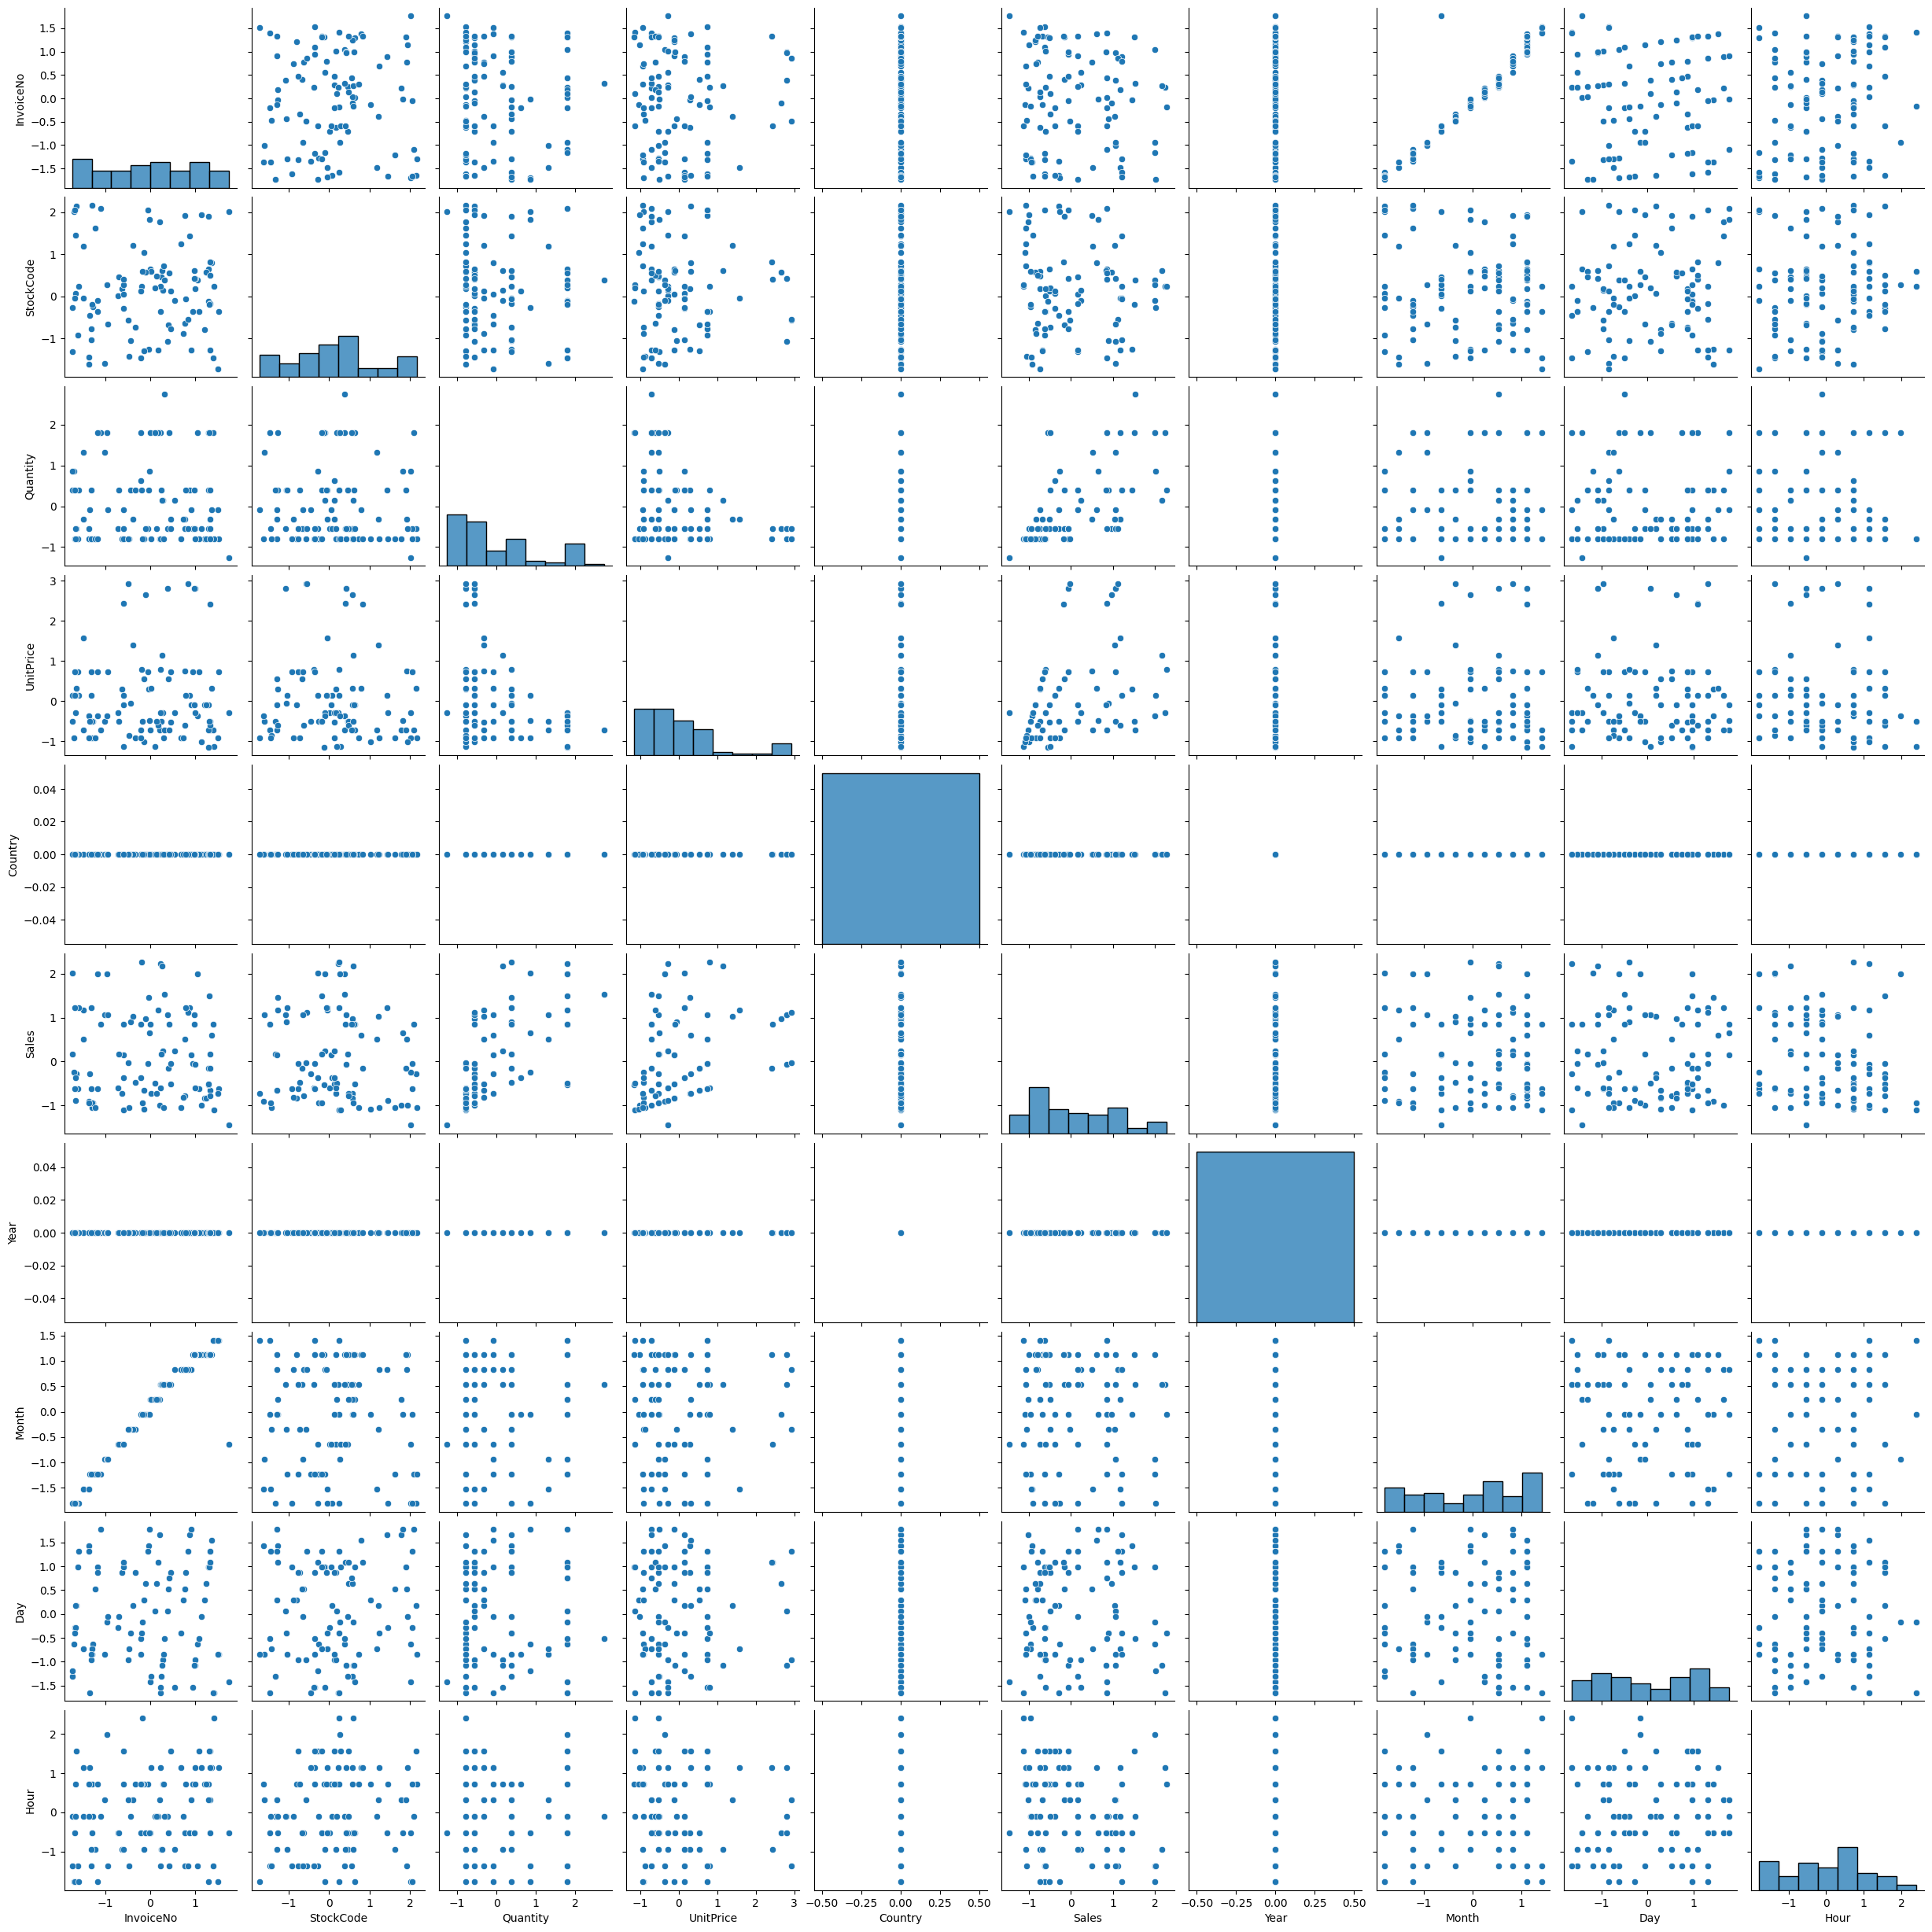

In [ ]:
# Confusion Matrix and Visualization
sns.pairplot(df.sample(100))
plt.show()

In [ ]:
# Selecting numerical columns
numerical_df = df.select_dtypes(include='number')

# Identifying columns with negative values
negative_columns = numerical_df.columns[(numerical_df < 0).any()]

# Display results
print("Numeric columns with negative values:")
print(negative_columns)

# Checking how many negative values exist in each of these columns
negative_counts = (numerical_df[negative_columns] < 0).sum()
print("\nCount of negative values per column:")
print(negative_counts)


Numeric columns with negative values:
Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Sales', 'Month',
       'Day', 'Hour'],
      dtype='object')

Count of negative values per column:
InvoiceNo    175158
StockCode    198049
Quantity     243442
UnitPrice    228827
Sales        224108
Month        176591
Day          183554
Hour         193149
dtype: int64


In [ ]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Sales,Year,Month,Day,Hour
42481,-1.740280,-0.353441,1.328843,2011-01-04 10:00:00,-0.364530,0.0,1.461757,0.0,-1.808649,-1.309288,-1.362411
42484,-1.740280,-0.361089,0.150726,2011-01-04 10:00:00,-0.289062,0.0,0.245112,0.0,-1.808649,-1.309288,-1.362411
42485,-1.740280,-1.600115,1.328843,2011-01-04 10:00:00,-0.716719,0.0,0.515477,0.0,-1.808649,-1.309288,-1.362411
42486,-1.740280,2.048128,1.328843,2011-01-04 10:00:00,-0.364530,0.0,1.461757,0.0,-1.808649,-1.309288,-1.362411
42487,-1.740280,-1.625246,0.386349,2011-01-04 10:00:00,0.289533,0.0,1.461757,0.0,-1.808649,-1.309288,-1.362411
...,...,...,...,...,...,...,...,...,...,...,...
541886,1.538145,-0.344700,1.800090,2011-12-09 12:31:00,-1.149407,0.0,-0.541652,0.0,1.407667,-0.737703,-0.525945
541887,1.538145,0.621172,-0.084898,2011-12-09 12:31:00,0.541097,0.0,0.853434,0.0,1.407667,-0.737703,-0.525945
541888,1.538145,0.435428,1.800090,2011-12-09 12:31:00,-0.867657,0.0,0.366776,0.0,1.407667,-0.737703,-0.525945
541889,1.538145,-0.275865,1.800090,2011-12-09 12:31:00,-0.364530,0.0,1.988970,0.0,1.407667,-0.737703,-0.525945


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363006 entries, 42481 to 541890
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    363006 non-null  float64       
 1   StockCode    363006 non-null  float64       
 2   Quantity     363006 non-null  float64       
 3   InvoiceDate  363006 non-null  datetime64[ns]
 4   UnitPrice    363006 non-null  float64       
 5   Country      363006 non-null  float64       
 6   Sales        363006 non-null  float64       
 7   Year         363006 non-null  float64       
 8   Month        363006 non-null  float64       
 9   Day          363006 non-null  float64       
 10  Hour         363006 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 33.2 MB


In [ ]:
# Extract time-based features

import pandas as pd

df = pd.read_csv('/content/superstoredata.csv.zip')
df
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales,Year,Month,Day,Hour
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,2011,12,9,12
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,2011,12,9,12
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,2011,12,9,12


# **Feature engineering**

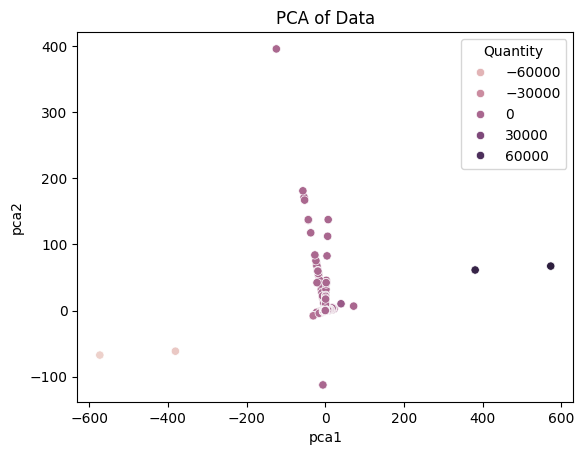

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric features for PCA
features = ['Quantity', 'Sales', 'UnitPrice']


# Standardize the features
X = StandardScaler().fit_transform(df[features].fillna(0))  # Fill NaN with 0s for standardization

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results using a relevant column
sns.scatterplot(x='pca1', y='pca2', hue='Quantity', data=df)  # Changed hue to 'Quantity'
plt.title('PCA of Data')
plt.show()

In [ ]:
X

array([[-0.01628867, -0.00709536, -0.02130135],
       [-0.01628867,  0.00620945, -0.01262006],
       [-0.00711777,  0.01059159, -0.01923438],
       ...,
       [-0.02545958, -0.00366356, -0.00476555],
       [-0.02545958, -0.00366356, -0.00476555],
       [-0.03004503, -0.00828328,  0.00350235]])

# **Data Scaling**

In [ ]:
# Standard Scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# **modeling**

**Initial modeling and hypothesis testing**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Define a binary target variable (e.g., is_high_mileage based on a threshold of 100,000 km)

df['is_high_mileage'] = df['Quantity'].apply(lambda x: 1 if x >= 1000 else 0)

# Define features and target variable
X = df[['Sales', 'UnitPrice', 'Quantity']]
y = df['is_high_mileage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 1.00


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# # List of regression models to apply
 from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
 from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor

# models = {
     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(),
#     "Lasso Regression": Lasso(),
#     "ElasticNet Regression": ElasticNet(),
     "Decision Tree": DecisionTreeRegressor(),
     "Random Forest": RandomForestRegressor(),
     "Gradient Boosting": GradientBoostingRegressor(),
 #    "Support Vector Regressor": SVR(),
#     "K-Nearest Neighbors": KNeighborsRegressor(),
#     "Neural Network": MLPRegressor(max_iter=1000)
# }

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Apply each model and compute metrics
results = {}
for name, model in models.items():
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [ ]:

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE       RMSE            R²
Linear Regression         0.000597   0.016812  4.246940e-02
Ridge Regression          0.000597   0.016812  4.246940e-02
Lasso Regression          0.000519   0.017181 -1.732281e-05
ElasticNet Regression     0.000522   0.017099  9.499974e-03
Decision Tree             0.000009   0.003038  9.687408e-01
Random Forest             0.000009   0.003038  9.687408e-01
Gradient Boosting         0.000009   0.003037  9.687424e-01
Support Vector Regressor  0.097020   0.097189 -3.100115e+01
K-Nearest Neighbors       0.000041   0.004296  9.374815e-01
Neural Network            0.577538  74.075836 -1.859039e+07


In [ ]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.003037535900564194
R² Score: 0.9687407706506691


# **Documentation and reporting**

📝 Project Overview

The MegaStore Sales dataset provides a detailed record of historical transactions, including information about products, sales, discounts, profit, regions, and shipping. This analysis is conducted to extract meaningful insights and support data-driven decisions in sales, marketing, operations, and inventory management.

🎯 Objectives

To identify high-performing and underperforming product categories and sub-categories.

To analyze temporal sales trends and uncover seasonal fluctuations in revenue, profit, and quantity sold.

To evaluate regional sales performance and detect geographical disparities.

To assess the impact of shipping modes on delivery efficiency and profit margins.

To investigate how discount levels influence profitability and sales volume.

To build predictive models for forecasting sales and estimating transaction-level profit.

📊 Key Analysis Areas

Sales Trend Analysis: Time-series insights to guide inventory and promotional strategies.

Category & Regional Performance: Understanding which combinations drive the highest revenue.

Shipping Efficiency: Analyzing delivery methods and their effect on operations.

Discount Impact: Correlating discount rates with profit/loss outcomes.

Customer Segmentation (optional): Grouping customers based on purchasing patterns (if customer data is present).

🤖 Modeling & Forecasting

Sales Forecasting: Predicting future sales using historical trends and time features.

Profit Prediction: Estimating expected profit based on features like discount, category, and shipping mode.

Model Accuracy:

RMSE: 0.0030

R² Score: 0.9687

The high R² value indicates the model explains approximately 96.87% of the variance in profit, while the very low RMSE reflects strong prediction accuracy.

🧠 Business Value
bold text
This project equips decision-makers with actionable insights into sales performance, operational bottlenecks, and customer behavior. The findings can help optimize pricing strategies, streamline logistics, and align marketing efforts with revenue goals.